In [54]:
#!/usr/bin/python
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import glob
# from model import *
from functions import *
import pdb
import scipy
import scipy.stats as stats
from scipy.signal import spectrogram
from matplotlib.pyplot import specgram
from scipy.fft import fft, ifft, fftfreq, fftshift

# Go to the directory and print the *.csv files 

In [3]:
directory = '/raid/togzhan_syrymova/lump_project/data/'
os.chdir(directory)
# glob.glob('*.csv')

# Load the datasets 

In [4]:
directory = '/raid/togzhan_syrymova/lump_project/data/'
os.chdir(directory)
csv_files_train = glob.glob('df_train*raw*8.csv')
csv_files_test = glob.glob('test*raw*.csv')
csv_files_dev = glob.glob('df_dev*raw*8.csv')

index = 0

df_train_ = pd.read_csv(csv_files_train[index], sep = ',', header = None)
df_train_ = pd.DataFrame(df_train_.values[1:,:])

df_test1 = pd.read_csv(csv_files_test[index], sep = ',', header = None)
df_test2 = pd.read_csv(csv_files_test[index+1], sep = ',', header = None)
df_test_ = pd.concat([df_test1, df_test2], axis = 1)
df_test_ = df_test_.transpose()

df_dev_ = pd.read_csv(csv_files_dev[index], sep = ',', header = None)
df_dev_ = pd.DataFrame(df_dev_.values[1:,:])


print(csv_files_train, '\n')
print(csv_files_test, '\n')
print(csv_files_dev, '\n')

print(csv_files_train[index], '\n')
print(csv_files_test[index], '\n')
print(csv_files_dev[index], '\n')

['df_train_raw_8.csv'] 

['test_pressure_data_without_raw.csv', 'test_pressure_data_with_raw.csv'] 

['df_dev_raw_8.csv'] 

df_train_raw_8.csv 

test_pressure_data_without_raw.csv 

df_dev_raw_8.csv 



# Get labels and data separately

In [5]:
# Train and dev labels
train_y11 = pd.DataFrame((df_train_.values[:,-1].astype('float64')))
dev_y11 = pd.DataFrame((df_dev_.values[:,-1].astype('float64')))

# Create test labels
test_y11 = pd.concat([ pd.DataFrame([0 for i in range(2*32*9)]), pd.DataFrame([1 for i in range(2*32*9)])], axis=0)
test_y11 = test_y11.reset_index(drop=True)


df_train1 = pd.DataFrame(df_train_.values[:,:-1].astype('float64'))
df_dev1 = pd.DataFrame(df_dev_.values[:,:-1].astype('float64'))
df_test1 = df_test_.astype('float64')

## SHUFFLE the TEST labels and data
test_y1, df_test1 = shuffle(test_y11.astype('float64'), df_test1)

# Create 6s segment with moving starting point 

In [61]:
duration = 6
fs = 160
samples = 1120
start_time = 0 
end_time = samples
sliding_window = 10
# df_data_s = pd.DataFrame()
# df_data_w = pd.DataFrame()
df_train_inter = pd.DataFrame()
df_test_inter = pd.DataFrame()
df_dev_inter = pd.DataFrame()

for i in range(fs//sliding_window):
    df_train_one_inter = pd.DataFrame()
    df_test_one_inter = pd.DataFrame()
    df_dev_one_inter = pd.DataFrame()
    for j in range(15):
        start = j*samples+i*sliding_window
        end = (j+1)*duration*fs+j*(samples-duration*fs)+i*sliding_window
        
        df_train_s = pd.DataFrame(df_train1.values[:, start:end])
        df_test_s = pd.DataFrame(df_test1.values[:, start:end])
        df_dev_s = pd.DataFrame(df_dev1.values[:, start:end])

        df_train_one_inter = pd.concat([df_train_one_inter, df_train_s], axis = 1)
        df_train_one_inter.columns = [''] * len(df_train_one_inter.columns)
        df_train_one_inter = df_train_one_inter.reset_index(drop=True)
        
        df_test_one_inter = pd.concat([df_test_one_inter, df_test_s], axis = 1)
        df_test_one_inter.columns = [''] * len(df_test_one_inter.columns)
        df_test_one_inter = df_test_one_inter.reset_index(drop=True)
        
        df_dev_one_inter = pd.concat([df_dev_one_inter, df_dev_s], axis = 1)
        df_dev_one_inter.columns = [''] * len(df_dev_one_inter.columns)
        df_dev_one_inter = df_dev_one_inter.reset_index(drop=True)
        
    df_train_inter = df_train_inter.reset_index(drop=True)
    df_train_inter = pd.concat([df_train_inter, df_train_one_inter], axis = 0)
    
    df_test_inter = df_test_inter.reset_index(drop=True)
    df_test_inter = pd.concat([df_test_inter, df_test_one_inter], axis = 0)
    
    df_dev_inter = df_dev_inter.reset_index(drop=True)
    df_dev_inter = pd.concat([df_dev_inter, df_dev_one_inter], axis = 0)

In [64]:
15*(160*6)

14400

In [62]:
print(np.shape(df_train_inter))
print(np.shape(df_test_inter))

print(np.shape(df_dev_inter))


(64512, 14400)
(18432, 14400)
(9216, 14400)


In [67]:
df_train_inter
np.shape(df_train_inter)[0]

64512

# Compute spectogram

(64512, 129, 18)
(9216, 129, 18)
(18432, 129, 18)


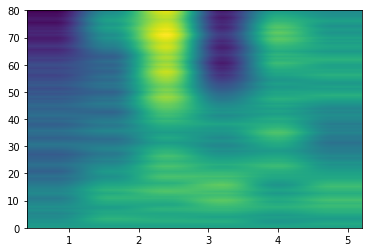

In [66]:
print(np.shape(df_test3))

(1152, 129, 21)


In [ ]:
df_dev3, t, f = compute_spectogram(df_dev1)
dev_y1 = dev_y11
print(np.shape(df_dev3))
df_test3, t, f = compute_spectogram(df_test1)
test_y1 = test_y1
print(np.shape(df_test3))

In [ ]:
i = 3
j = 0
fs = 160 
a = specgram(df_train1.values[j, 1120*i:(i+1)*1120], Fs=fs, detrend='mean', mode = 'psd')
plt.show()
Sxx, f, t, im = specgram(df_train1.values[j, 1120*i:(i+1)*1120], Fs=fs, detrend='mean', mode = 'phase')
plt.show()
# print(np.shape(a))
# print(np.shape(df_train1.values[j, 1120*i:(i+1)*1120]))
# plt.plot(df_train1.values[j, 1120*i:(i+1)*1120])
# plt.show()
plt.pcolormesh(t, f, Sxx, shading='gouraud')

In [ ]:
shape = np.shape(df_train3)
df_train = np.reshape(df_train3, (shape[0], shape[1], shape[2]*shape[3]))

shape = np.shape(df_dev3)
df_dev = np.reshape(df_dev3, (shape[0], shape[1], shape[2]*shape[3]))


shape = np.shape(df_test3)
df_test = np.reshape(df_test3, (shape[0], shape[1], shape[2]*shape[3]))

# Create Tensor from labels and data

In [ ]:
# Create tensor from labels
# Transform labels in the format 1_9 to binary
train_y3 = pd.DataFrame(np.floor(train_y1.values[:].astype('float64')/10))
dev_y3 = pd.DataFrame(np.floor(dev_y1.values[:].astype('float64')/10))

train_y = torch.FloatTensor(train_y3.values[:])
dev_y = torch.FloatTensor(dev_y3.values[:])
test_y = torch.FloatTensor(test_y1.values[:])

train_x	= torch.FloatTensor(df_train.astype('float64'))
dev_x = torch.FloatTensor(df_dev.astype('float64'))
test_x = torch.FloatTensor(df_test.astype('float64'))

In [ ]:
from torchvision.models import resnet34

class ResNet34(nn.Module):
    def __init__(self):
        super(ResNet34,self).__init__()
        
        self.block1 = nn.Sequential(
            nn.Conv2d(1,64,kernel_size=2,stride=2,padding=3,bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )
        
        self.block2 = nn.Sequential(
            nn.MaxPool2d(1,1),
            ResidualBlock(64,64),
            ResidualBlock(64,64,2)
        )
        
        self.block3 = nn.Sequential(
            ResidualBlock(64,128),
            ResidualBlock(128,128,2)
        )
        
        self.block4 = nn.Sequential(
            ResidualBlock(128,256),
            ResidualBlock(256,256,2)
        )
        self.block5 = nn.Sequential(
            ResidualBlock(256,512),
            ResidualBlock(512,512,2)
        )
        
        self.avgpool = nn.AvgPool2d(2)
        # vowel_diacritic
        self.fc1 = nn.Linear(512,1)
#         # grapheme_root
#         self.fc2 = nn.Linear(512,168)
#         # consonant_diacritic
#         self.fc3 = nn.Linear(512,7)
        
    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.avgpool(x)
        x = x.view(x.size(0),-1)
        x1 = self.fc1(x)
#         x2 = self.fc2(x)
#         x3 = self.fc3(x)
        return x1#,x2,x3

# Define the hyperparameters of the model

In [ ]:
print('Started training')
seed = 777
torch.manual_seed(seed)

#################
# choose the gpu
gpu_id = 9
device = torch.device("cuda:" + str(gpu_id))
# device = torch.device("cpu")
print(device)

#################
# Input and output sizes
D_in = np.shape(train_x)[2]
channels_in = 1
channels_out = 1

D_out = 1

#################
# Choose the hidden layer, drop, batch_size, num_epochs, learning_rate
# H = 512  #hidden layer size

drop = 0.5
H1 = [1024, 512, 256, 128]#, 2048,1024, 512
N1 = [8, 16, 32, 64]
epochs = 100
learning_rate = 1e-3
kernel_size = 3
stride  = 2

# loss_fn = torch.nn.BCELoss()BCEWithLogitsLoss
# N = batch_size

best_epoch = 0
dev_acc_max=0
epoch_max=0
loss_list     = np.zeros((epochs,))
accuracy_list = np.zero
s((epochs,))


In [ ]:
for N in N1:
    for H in H1:
    #         H = 512
    #         H2 = 256
#         epochs  =1
        directory = '/raid/togzhan_syrymova/lump_project/models/'

        model = ConvLayerNet3(channels_in, channels_out, D_in, H, D_out, device, drop, kernel_size, stride).to(device)
        model_name = type(model).__name__

        model_name += '_pressure_' + 'conv2_' + 'epochs_' \
        + str(epochs) + '_bs_' + str(N)+ '_H_' + str(H) \
        + '_drop_' + str(drop) \
        + '_ks_' + str(kernel_size) + '_stride_' + str(stride) + '_spect_1d'
        model_path = directory + model_name

        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        loss_fn = torch.nn.BCELoss()#BCELoss()
        print(model_name)
        print(model_path)
        print(model)

        # for H in H1:
        #     for N in N1:
        print(H)
        print(N)
        for e in range(epochs):
            total_loss = 0
            for i in range(0, train_x.shape[0], N):
                if i+N >= train_x.shape[0]:
                    x = train_x[i:]
                    y = train_y[i:]
                else:
                    x = train_x[i:i+N]
                    y = train_y[i:i+N]
                y_pred = model(x.to(device))
                loss = loss_fn(y_pred, y.to(device))
        #         loss_list[e] = loss.item()
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            print("Epoch {}/{}, Train Loss: {:.3f}".format(e+1, epochs, total_loss))
            #pdb.set_trace()
            #Loss and accuracy on dev data
            with torch.no_grad():
                model.eval()
                output = model(dev_x.to(device))
                output = (output>0.5).float()
                acc    = accuracy_score(dev_y, output.cpu())
        #         accuracy_list[e] = acc
                if acc > dev_acc_max:
                    dev_acc_max=acc
                    epoch_max=e+1
                    torch.save(model, model_path)
              #correct = (output == dev_y.to(device)).float().sum()
    #             model.train()
                torch.save(model, model_path+'_last')
            print("Dev Accuracy: {:.3f}".format(acc))

        print("##############################################")
        print("Best dev accuracy is {:.3f} at epoch {}".format(dev_acc_max, epoch_max))
        print("Number of class 1 samples: ", (dev_y>0.5).float().sum().item())
        print("##############################################")

        ####################################################################################################
        #Evaluation
        ####################################################################################################
        with torch.no_grad():
        #             pdb.set_trace()
            model = torch.load(model_path)
            model.eval().to(device)
            output = model(test_x.to(device))
            output = (output>0.5).float()
            acc    = accuracy_score(test_y, output.cpu())
            print("Test Accuracy: {:.3f}".format(acc))
            print(model)

        with torch.no_grad():
        #             pdb.set_trace()
            model = torch.load(model_path+'_last')
            model.eval().to(device)
            output = model(test_x.to(device))
            output = (output>0.5).float()
            acc    = accuracy_score(test_y, output.cpu())
            print("Test Accuracy Last: {:.3f}".format(acc))
            print(model)
exit()

In [ ]:
exit()


In [ ]:
with torch.no_grad():
#             pdb.set_trace()
#     model = torch.load(model_path)
    model.eval().to(device)
    output = model(test_x.to(device))
    output = (output>0.5).float()
    acc    = accuracy_score(test_y, output.cpu())
    print("Test Accuracy: {:.3f}".format(acc))
    print(model)